In [1]:
using Pkg; Pkg.add("BenchmarkTools")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Qt5Base_jll ─── v5.15.3+1
   Installed LLVMExtra_jll ─ v0.0.14+3
    Updating `~/.julia/environments/v1.7/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.3.1
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.3.1
  [dad2f222] ↑ LLVMExtra_jll v0.0.14+2 ⇒ v0.0.14+3
  [ea2cea3b] ↑ Qt5Base_jll v5.15.3+0 ⇒ v5.15.3+1
Precompiling project...
  ✓ BenchmarkTools
  ✓ LLVMExtra_jll
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ LLVM
  ✓ GR
  ✓ GPUArrays
  ✓ GPUCompiler
 Interrupted: Exiting precompilation...


In [2]:
using BenchmarkTools

In [3]:
using Plots

### Vamos a usar la integral   $\, \int_0^{\pi/2} \, sin^2(x) \, dx \, = \, \pi/2 \,$   para probar los resultados del algoritmo de simpson compuesto.

In [8]:
f(x) = sin(x)^2

f (generic function with 1 method)

**El algoritmo de la regla de simpson compuesto es:** 



$ \;\int_a^b f(x)\,dx = h/3 \,[\,f(a)\,+\,2\,\sum_{j=1}^{n/2-1}\,f(x_{2j})\,+\,4\,\sum_{j=1}^{n/2}f(x_{2j-1})\,+\,f(b)]$



**La segunda sumatoria se puede escribir como**


$ \,\sum_{j=1}^{n/2}f(x_{2j-1})\,=\,\sum_{j=1}^{n/2 - 1}f(x_{2j-1})\,+\,f(x_{n-1})$


**Entonces:** 


$ \;\int_a^b f(x)\,dx = h/3 \,[\,f(a)\,+\,2\,\sum_{j=1}^{n/2-1}\,f(x_{2j})\,+\,4\,\sum_{j=1}^{n/2 - 1}f(x_{2j-1})\,+\,4\,f(x_{n-1})\,+\,f(b)]$


**Juntando las 2 sumatorias se tiene:** 


$ \;\int_a^b f(x)\,dx = h/3 \,[\,f(a)\,+\,\sum_{j=1}^{n/2-1}\,[\,2\,f(x_{2j})\,+\,4\,f(x_{2j-1})\,]\,+\,4\,f(x_{n-1})\,+\,f(b)]$


**Luego, el punto j-ésimo es:** 


$ x_j\,= a + j(b-a)/n$


**Entonces el punto $x_{n-1}$ es:**


$ x_{n-1}\,=\,a\,+\,(n-1)(b-a)\,/n$


$x_{n-1}\,=\,a\,+\,(b-a)\,-\,(b-a)\,/n$


$x_{n-1}\,=\,b\,-\,(b-a)\,/n$


$x_{n-1}\,=\,b\,-\,h$


**Entonces:** 


$ \;\int_a^b f(x)\,dx = h/3 \,[\,f(a)\,+\,\sum_{j=1}^{n/2-1}\,[\,2\,f(x_{2j})\,+\,4\,f(x_{2j-1})\,]\,+\,4\,f(b-h)\,+\,f(b)]$


$ \;\int_a^b f(x)\,dx = h/3 \,[\,f(a)\,+\,4\,f(b-h)\,+\,f(b)\,+\,\sum_{j=1}^{n/2-1}\,[\,2\,f(x_{2j})\,+\,4\,f(x_{2j-1})\,]]$


$ \;\int_a^b f(x)\,dx = h/3 \,[\,f(a)\,+\,f(b)\,+\,2\,\,[\,2\,f(b-h)\,+\,\sum_{j=1}^{n/2-1}\,[\,f(x_{2j})\,+\,2\,f(x_{2j-1})\,]]$

### Por lo tanto el código es:

In [9]:
function Simpson_com(f,a,b,n)
    @assert n%2==0
    h = (b - a)/n
    s = 2*f(b - h) + sum(i -> 2*f(a + h*(2*i-1)) + f(a + h*2*i), 1:n/2 - 1)
    return (2*s + f(a) + f(b))*h/3
end

Simpson_com (generic function with 1 method)

**Notar que en este codigo $n$ no es el numero de puntos, sino el numero de subintervalos en el que se divide el intervalo.**

**Se prueba si el resultado da bien. Y de paso se calcula el tiempo que tarda en correr el programa.**

In [10]:
@benchmark Simpson_com(f,0,π,100)

BenchmarkTools.Trial: 10000 samples with 107 evaluations.
 Range (min … max):  777.421 ns … 932.935 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     792.280 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   791.655 ns ±   5.883 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▂      ▃▅▂  ▂▅▄ ▄▃▁▄▆█▆▁ ▁▃▂   ▁                              ▂
  █▇▃▁▁▁▇███▇████▇████████▅███▇▇▇██▄▄▃▅▅▁▁▁▁▃▄▁▄▄▃▆▄▆▄▆▅▆▅▅▆▇▆▇ █
  777 ns        Histogram: log(frequency) by time        820 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

**Para ver una medida del error hacemos la diferencia entre el resultado obtenido y $\pi/2$.**

In [11]:
@benchmark abs(Simpson_com(f,0,π,100) - pi/2.)

BenchmarkTools.Trial: 10000 samples with 103 evaluations.
 Range (min … max):  773.913 ns … 839.942 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     793.728 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   792.983 ns ±   5.721 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

        ▂▃    ▁▁   ▄▆▅▅▁▁▁█▇▄    ▁▁▁▁                           ▂
  █▃▃▁▁▁██▃▁▁███▇█▇██████████▇▇▇▇████▇▄▄▃▅▄▅▅▃▁▄▃▃▃▄▄▅▅▆▅▇▇▇▆▆▆ █
  774 ns        Histogram: log(frequency) by time        823 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

**Se ve que el error esta en el orden de $10^{-16}$. Para ver como varia el error del método, cuando varía el numero de intervalos, se puede graficar los errores absolutos y ver como oscila.**

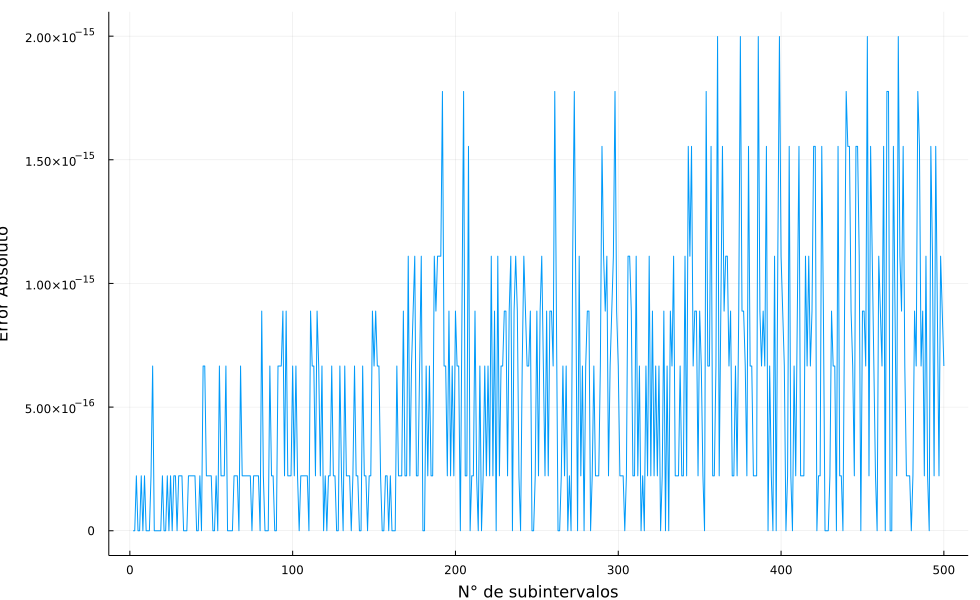

In [12]:
i = 2:500
plot(i,i->abs(Simpson_com(f,0,pi/1.,2i) - pi/2.),size=(980,600),legend=:none)
plot!(ylabel="Error Absoluto",xlabel="N° de subintervalos")

**Puede verse que el error absoluto se mantiene bajo, pero a medida que se aumenta el numero de intervalos, el error se vuelve mas inestable y tiende a aumentar. Al aumentar el numero de intervalos, estos disminuyen en tamaño, lo que hace que los calculos se realicen con numeros cada vez mas pequeños, y esto hace que los errores de representacion de numeros esten cada vez mas presentes.**